In [222]:
import pandas as pd


df = pd.read_csv('data.csv')
df.dropna()
df

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М
...,...,...,...
232,5,30,М
233,4,36,Ж
234,2,60,Ж
235,2,44,Ж


--------------------------------------

Анализ гипотезы: Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин

In [223]:
selected_group_of_men_df = df.loc[(df['Количество больничных дней'] > 2) & (df['Пол'] == 'М')]

selecetd_group_of_women_df = df.loc[(df['Количество больничных дней'] > 2) & (df['Пол'] == 'Ж')]


amount_of_selected_men = len(selected_group_of_men_df)
amount_of_selected_women = len(selecetd_group_of_women_df)


print('Число людей по выбранным группам:')
print('Мужчины: ', amount_of_selected_men)
print('Женщины: ', amount_of_selected_women) 

Число людей по выбранным группам:
Мужчины:  84
Женщины:  67


В качестве метрики используем: отношение <mark>числа сотрудников каждой выбранной группы</mark> к <mark>общему числу сотрудников определенонго пола</mark>

In [224]:
amount_of_all_men = len(df.loc[(df['Пол'] == 'М')])
amount_of_all_women = len(df.loc[(df['Пол'] == 'Ж')])


percent_of_men = amount_of_selected_men / amount_of_all_men * 100
percent_of_women = amount_of_selected_women / amount_of_all_women * 100


print('% от общего числа сотрудников соответвуюшего пола:')
print('Мужчины: ', percent_of_men, '%')
print('Женщины: ',  percent_of_women, '%')


print('\n')


if percent_of_men > percent_of_women:
    print('% пропускающих людей (мужчины) > % пропускающих людей (женщины) на ', abs(percent_of_men-percent_of_women), ' %')

elif percent_of_men < percent_of_women:
    print('% пропускающих людей (мужчины) < % пропускающих людей (женщины) на', abs(percent_of_men-percent_of_women), ' %')

else: 
    print('% пропускающих людей (мужчины) = % пропускающих людей (женщины)')

% от общего числа сотрудников соответвуюшего пола:
Мужчины:  60.431654676258994 %
Женщины:  68.36734693877551 %


% пропускающих людей (мужчины) < % пропускающих людей (женщины) на 7.935692262516518  %


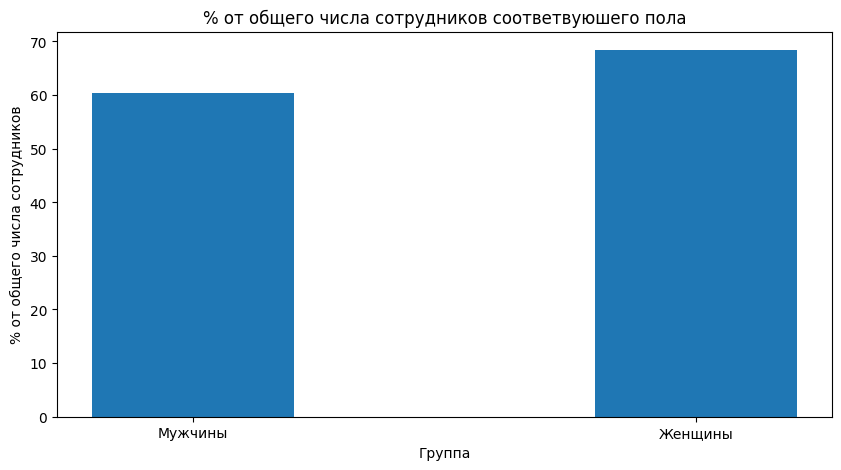

In [225]:
import matplotlib
import matplotlib.pyplot as plt


result = {'Мужчины': amount_of_selected_men / amount_of_all_men * 100, 
          'Женщины': amount_of_selected_women / amount_of_all_women * 100}


courses = list(result.keys())
values = list(result.values())

fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values,
        width = 0.4)
 
plt.xlabel("Группа")
plt.ylabel("% от общего числа сотрудников")
plt.title("% от общего числа сотрудников соответвуюшего пола")
plt.show()

In [ ]:
unique_amount_of_sick_days = selected_group_of_men_df['Количество больничных дней'].unique()

percent_of_men_per_amount_of_sick_days = {}

for amount_of_sick_days in unique_amount_of_sick_days:
    amount_of_men = len(df.loc[(df['Пол'] == 'М') & (df['Количество больничных дней'] == amount_of_sick_days)])

    percent_of_men_per_amount_of_sick_days[amount_of_sick_days] = amount_of_men / amount_of_all_men * 100


In [ ]:
unique_amount_of_sick_days = selected_group_of_men_df['Количество больничных дней'].unique()

percent_of_women_per_amount_of_sick_days = {}

for amount_of_sick_days in unique_amount_of_sick_days:
    amount_of_women = len(df.loc[(df['Пол'] == 'Ж') & (df['Количество больничных дней'] == amount_of_sick_days)])

    percent_of_women_per_amount_of_sick_days[amount_of_sick_days] = amount_of_women / amount_of_all_women * 100


In [ ]:
courses = list(percent_of_men_per_amount_of_sick_days.keys())
values = list(percent_of_men_per_amount_of_sick_days.values())


fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values,
        width = 0.4)
 
plt.xlabel("Число больничных дней")
plt.ylabel("% от общего числа сотрудников")
plt.title("% от общего числа сотрудников соответвующего пола (мужчины)")
plt.show()

In [ ]:
courses = list(percent_of_women_per_amount_of_sick_days.keys())
values = list(percent_of_women_per_amount_of_sick_days.values())


fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values,
        width = 0.4)
 
plt.xlabel("Число больничных дней")
plt.ylabel("% от общего числа сотрудников")
plt.title("% от общего числа сотрудников соответвующего пола (женщины)")
plt.show()

--------------------------------------------------------------------------------------------------------------------------

Анализ гипотезы: Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.

In [226]:
selected_group_of_olds_df = df.loc[(df['Возраст'] > 35) & (df['Количество больничных дней'] > 2)]
selected_group_of_youngs_df = df.loc[(df['Возраст'] <= 35) & (df['Количество больничных дней'] > 2)]


amount_of_selected_olds = len(selected_group_of_olds_df)
amount_of_selected_youngs = len(selected_group_of_youngs_df)


print('Число людей по выбранным группам:')
print('Cтарше 35: ', amount_of_selected_olds)
print('35 и младше: ', amount_of_selected_youngs) 

Число людей по выбранным группам:
Cтарше 35:  115
35 и младше:  36


В качестве метрики используем: отношение <mark>числа сотрудников каждой выбранной группы</mark> к <mark>общему числу сотрудников определеной возрастной группы</mark>

In [227]:
amount_of_all_olds = len(df.loc[(df['Возраст'] > 35)])
amount_of_all_youngs = len(df.loc[(df['Возраст'] <= 35)])


percent_of_olds = amount_of_selected_olds / amount_of_all_olds * 100
percent_of_youngs = amount_of_selected_youngs / amount_of_all_youngs * 100


print('% от общего числа сотрудников соответвуюшей возрастной группы:')
print('(старше 35): ',  percent_of_olds, '%')
print('35 и младше: ',  percent_of_youngs, '%')

print('\n')

if percent_of_olds > percent_of_youngs:
    print('% пропускающих людей (старше 35) > % пропускающих людей (35 и младше) на ', abs(percent_of_olds-percent_of_youngs), ' %' )


elif percent_of_olds < percent_of_youngs:
    print('% пропускающих людей (старше 35) < % пропускающих людей (35 и младше) на', abs(percent_of_olds-percent_of_youngs), ' %')

else: 
    print('% пропускающих людей (старше 35) = % пропускающих людей (35 и младше)')


% от общего числа сотрудников соответвуюшей возрастной группы:
(старше 35):  63.888888888888886 %
35 и младше:  63.1578947368421 %


% пропускающих людей (старше 35) > % пропускающих людей (35 и младше) на  0.7309941520467831  %


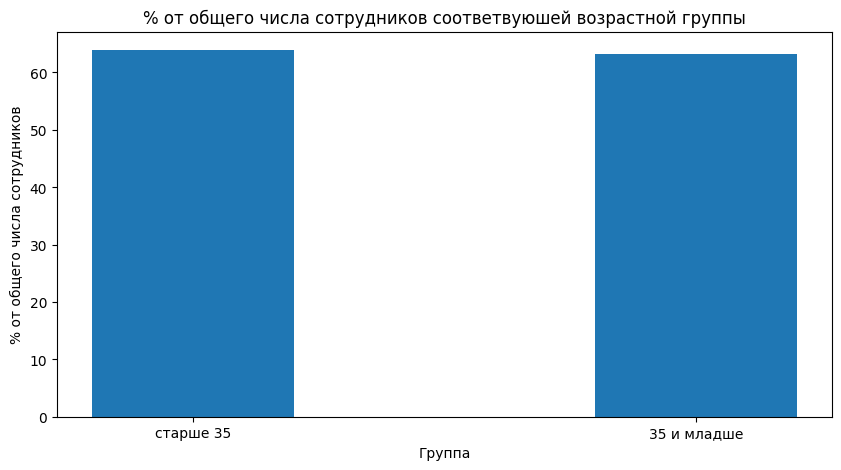

In [228]:
result = {'старше 35': amount_of_selected_olds / amount_of_all_olds * 100, 
          '35 и младше': amount_of_selected_youngs / amount_of_all_youngs * 100}


courses = list(result.keys())
values = list(result.values())


fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values,
        width = 0.4)
 
plt.xlabel("Группа")
plt.ylabel("% от общего числа сотрудников")
plt.title("% от общего числа сотрудников соответвуюшей возрастной группы")
plt.show()

In [229]:
unique_amount_of_sick_days = selected_group_of_olds_df['Количество больничных дней'].unique()

percent_of_olds_per_amount_of_sick_days = {}

for amount_of_sick_days in unique_amount_of_sick_days:
    amount_of_olds = len(df.loc[(df['Возраст'] > 35) & (df['Количество больничных дней'] == amount_of_sick_days)])

    percent_of_olds_per_amount_of_sick_days[amount_of_sick_days] = amount_of_olds / amount_of_all_olds * 100


In [230]:
unique_amount_of_sick_days = selected_group_of_youngs_df['Количество больничных дней'].unique()

percent_of_youngs_per_amount_of_sick_days = {}

for amount_of_sick_days in unique_amount_of_sick_days:
    amount_of_youngs = len(df.loc[(df['Возраст'] <= 35) & (df['Количество больничных дней'] == amount_of_sick_days)])

    percent_of_youngs_per_amount_of_sick_days[amount_of_sick_days] = amount_of_youngs / amount_of_all_youngs * 100


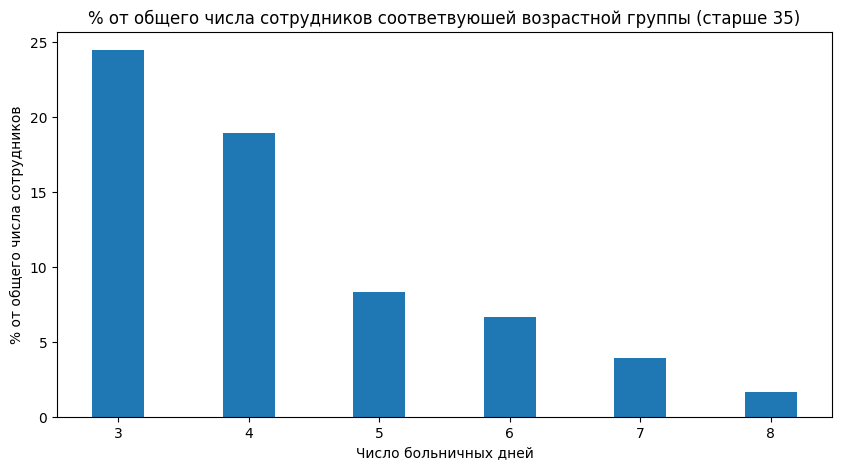

In [231]:

courses = list(percent_of_olds_per_amount_of_sick_days.keys())
values = list(percent_of_olds_per_amount_of_sick_days.values())


fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values,
        width = 0.4)
 
plt.xlabel("Число больничных дней")
plt.ylabel("% от общего числа сотрудников")
plt.title("% от общего числа сотрудников соответвуюшей возрастной группы (старше 35)")
plt.show()

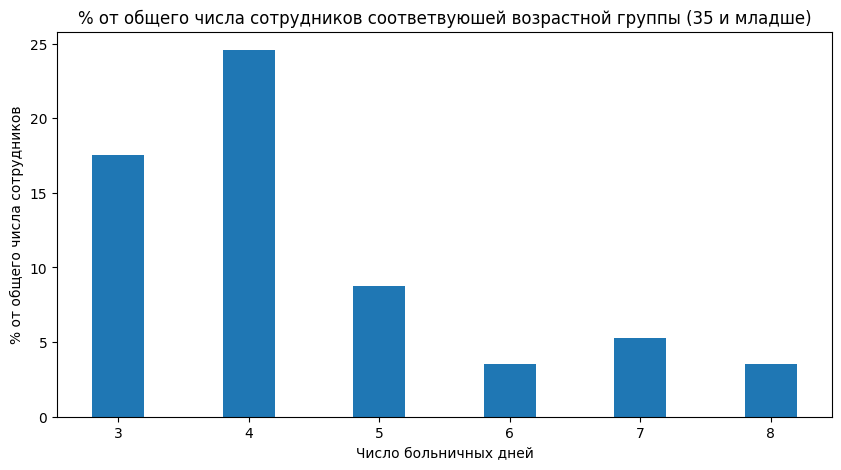

In [232]:

courses = list(percent_of_youngs_per_amount_of_sick_days.keys())
values = list(percent_of_youngs_per_amount_of_sick_days.values())


fig = plt.figure(figsize = (10, 5))
 
plt.bar(courses, values,
        width = 0.4)
 
plt.xlabel("Число больничных дней")
plt.ylabel("% от общего числа сотрудников")
plt.title("% от общего числа сотрудников соответвуюшей возрастной группы (35 и младше)")
plt.show()